# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and one of Q3 or Q4, for a total of 3 questions.

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [207]:
# 1.1 Clean the `Price` variable as well as you can, 
# and explain the choices you make. 
# How many missing values do you end up with? 
# (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

air = pd.read_csv("./data/airbnb_hw.csv")

# Dropping missing price data, as it tells us nothing about the price
air = air.dropna(subset = ["Price"])

# When price goes above 999, and it becomes a string, and contains a ',' for values in the thousands, 
# so this is converting those to numeric values, which can be used in mathematical operations and plotting
air["Price"] = air["Price"].str.replace(",", "")
air["Price"] = pd.to_numeric(air["Price"], errors = "coerce")

air["Price"].isnull().value_counts()
# Zero missing values

Price
False    30478
Name: count, dtype: int64

In [208]:
# 1.2 Clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` 
# when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? 
# Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. 
# Are there any patterns regarding when the data are missing? 

police = pd.read_csv("./data/mn_police_use_of_force.csv")
police["subject_injury"] = police["subject_injury"].apply(lambda x: x if x in ["Yes", "No"] else "Missing")
print(f"Proportion Missing: {round(police['subject_injury'].value_counts()['Missing'] / len(police['subject_injury']),3)}\n\n")

# Yes this is concerning. 76.2% of the subject injury data being missing is way too high,
# and likely indicates that the police are injuring more people than they are reporting

print(police["subject_injury"].value_counts(), "\n\n")
pd.crosstab(police["subject_injury"], police["force_type"])

# This cross table does have some apparent patterns. The missing subject injury observations have a
# significantly higher rate of having chemical irritants used against them. Also, police k9 bites are much more prevalent in the missing data
# than in the no injury data, meaning police dogs are biting subjects, and police are intentionally not reporting that in the subject injury column.

Proportion Missing: 0.762


subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64 




force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [209]:
# 1.3 For the pretrial data covered in the lecture, 
# clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, 
# in particular, replace missing values with `np.nan`
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False)

pretrial = pretrial.rename(columns = {"WhetherDefendantWasReleasedPretrial" : "Pretrial_Release"})
print(pretrial["Pretrial_Release"].value_counts(dropna = False), "\n\n")
pretrial["Pretrial_Release"] = pretrial["Pretrial_Release"].apply(lambda x: x if x in (0,1) else np.nan)
print(pretrial["Pretrial_Release"].value_counts(dropna = False), "\n\n")

Pretrial_Release
1    19154
0     3801
9       31
Name: count, dtype: int64 


Pretrial_Release
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64 




In [210]:
# 1.4 For the pretrial data covered in the lecture, 
# clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, 
# and explain the choices you make. 
# (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False)

In [211]:
# print(pretrial["ImposedSentenceAllChargeInContactEvent"].apply(type).value_counts())
# Converting values from strings to ints
pretrial["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(pretrial["ImposedSentenceAllChargeInContactEvent"], errors = "coerce")
# print(pretrial["ImposedSentenceAllChargeInContactEvent"].apply(type).value_counts())
print("\n\n")
print(pretrial["ImposedSentenceAllChargeInContactEvent"].value_counts(dropna = False))
print(pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts(dropna = False))
print("\n\n\n")




ImposedSentenceAllChargeInContactEvent
NaN          9053
0.000000     4953
12.000000    1404
0.985626     1051
6.000000      809
             ... 
49.971253       1
57.034908       1
79.926078       1
42.164271       1
1.657084        1
Name: count, Length: 484, dtype: int64
SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64






In [212]:
print(pd.crosstab(pretrial["ImposedSentenceAllChargeInContactEvent"], pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"], dropna = False))
# All the 4s and 9s (Pending, Dismissed, Deferred, Not Applicable) result in Imposed Sentence of NaN
# I understand why this is the case, but I am unsure what I am meant to do with this information from a cleaning perspective, so I am just going to drop them
pretrial = pretrial.dropna(subset = ["ImposedSentenceAllChargeInContactEvent"])
print(pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts(dropna = False))

# Imposed Sentence is measured in months. I understand that sentences go larger than life, 
# but for data analysis purposes, I can see the case for representing values above 100 years as 100 years, to indicate a life sentence,
# so I am setting values greater than 100 equal to 100
print(max(pretrial["ImposedSentenceAllChargeInContactEvent"]))
pretrial[pretrial["ImposedSentenceAllChargeInContactEvent"] > 100] = 100
print(max(pretrial["ImposedSentenceAllChargeInContactEvent"]))

SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2     4    9
ImposedSentenceAllChargeInContactEvent                                  
0.000000                                          4953   0  0     0    0
0.032854                                             0   6  0     0    0
0.065708                                             3  21  0     0    0
0.098563                                             2   6  0     0    0
0.131417                                             4  10  0     0    0
...                                                ...  .. ..   ...  ...
1500.000000                                          0   0  1     0    0
1752.000000                                          0   0  1     0    0
1980.000000                                          0   0  1     0    0
2208.000000                                          0   0  1     0    0
NaN                                                  0   0  0  8779  274

[484 rows x 5 columns]
SentenceTypeAllChargesAtCon

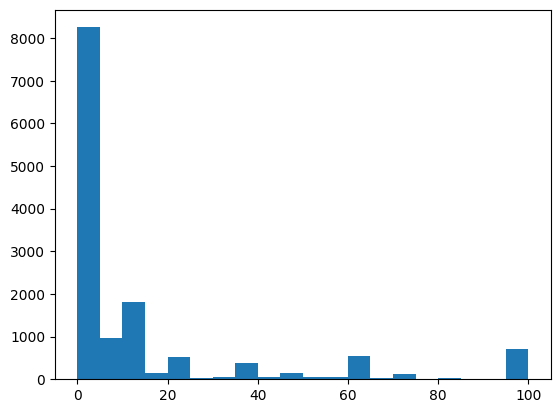

In [213]:
plt.hist(pretrial["ImposedSentenceAllChargeInContactEvent"], bins = 20)
plt.show()

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [214]:
# 2.1 - Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

# pip install xlrd
df = pd.read_excel("data/GSAF5.xls")
print(df.columns)
# Renaming species column to get rid of this space
df["Species"] = df["Species "]
df = df.drop(columns = ["Species "])
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Source', 'pdf',
       'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Species'],
      dtype='object')


In [215]:
# 2.2 - Drop any columns that do not contain data.

df = df.dropna(axis = 1, how = 'all')
df.columns
# Nothing changed?

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Source', 'pdf',
       'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Species'],
      dtype='object')

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

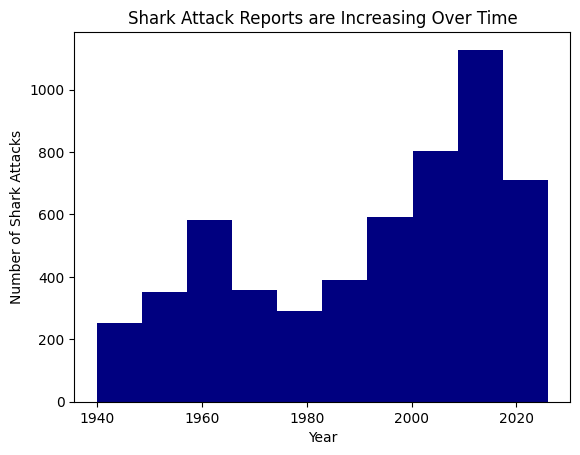

In [216]:
# 2.3 - Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

print(df['Year'].unique(), "\n\n")
df = df[~df['Year'].isin([np.nan, 77., 5., 0,])]
print(df['Year'].unique())

# The values range from 1000 to 2025
df = df[df['Year'] >= 1940]
df['Year'].unique()
# Shark Attacks increasing
plt.figure()
plt.hist(df['Year'], color = 'navy')
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attack Reports are Increasing Over Time")
plt.show()

[23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 12 42 36 37 50 'M' 9 11 34 '!6' 31 '!!' 47
 55 7 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22'
 '22, 57, 31' '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23'
 '12' '36' '63' '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74'
 '27' '3' '56' '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34'
 '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36'
 '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31'
 ' 28' '20?' "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s'


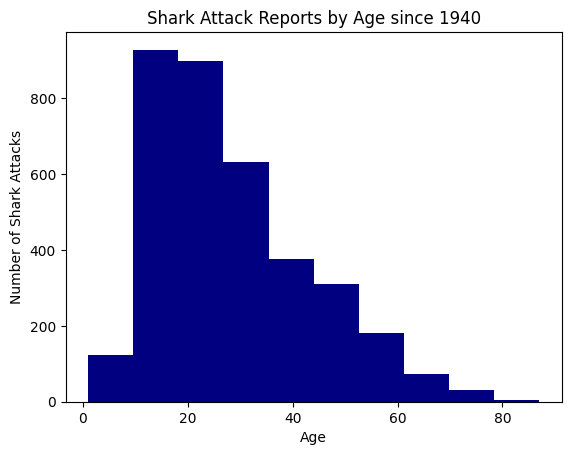

In [217]:
# 2.4 - Clean the Age variable and make a histogram of the ages of the victims.

print(df['Age'].unique(), "\n\n")
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset = ['Age'])
print(df['Age'].unique())

plt.figure()
plt.hist(df['Age'], color = 'navy')
plt.xlabel("Age")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attack Reports by Age since 1940")
plt.show()

In [218]:
# 2.5 - What proportion of victims are male?

print(df['Sex'].value_counts(), "\n\n")
df['Sex'] = df['Sex'].str.strip()
df = df[df['Sex'].isin(["M", "F"])]
print(df['Sex'].value_counts(), '\n\n')

print("The proportion of victims which are men is", round(sum(df['Sex'] == "M") / len(df), 3))

Sex
M      2977
F       545
 M        1
M         1
lli       1
Name: count, dtype: int64 


Sex
M    2979
F     545
Name: count, dtype: int64 


The proportion of victims which are men is 0.845


In [219]:
# 2.6 - Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

print(df['Type'].value_counts(), "\n\n")
df['Type'] = df['Type'].apply(lambda x: x if x in ["Unprovoked", "Provoked"] else "Unknown")
print(df['Type'].value_counts(), "\n\n")

print("The proportion of attacks which are unprovoked is", round(sum(df['Type'] == "Unprovoked") / len(df), 3))

Type
Unprovoked             2933
Provoked                286
Invalid                 203
Watercraft               39
Sea Disaster             37
Questionable             15
?                         1
Under investigation       1
Name: count, dtype: int64 


Type
Unprovoked    2933
Unknown        305
Provoked       286
Name: count, dtype: int64 


The proportion of attacks which are unprovoked is 0.832


In [220]:
# 2.7 - Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

print(df['Fatal Y/N'].unique(), "\n\n")
df = df.dropna(subset = ['Fatal Y/N'])
print(df['Fatal Y/N'].value_counts(), "\n\n")
df['Fatal Y/N'] = df['Fatal Y/N'].astype(str)
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip()
print(df['Fatal Y/N'].value_counts(), "\n\n")
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: x if x in ["Y", "N"] else "Unknown")
print(df['Fatal Y/N'].value_counts())

['N' 'Y' 'F' nan 'M' 2017 'UNKNOWN' ' N'] 


Fatal Y/N
N          2795
Y           511
UNKNOWN       7
 N            6
F             4
M             1
2017          1
Name: count, dtype: int64 


Fatal Y/N
N          2801
Y           511
UNKNOWN       7
F             4
M             1
2017          1
Name: count, dtype: int64 


Fatal Y/N
N          2801
Y           511
Unknown      13
Name: count, dtype: int64


In [221]:
# 2.8 - Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

prop_unprovoked_by_sex = df[df["Type"] == "Unprovoked"].groupby("Sex")["Type"].count() / df.groupby("Sex")["Type"].count() 
print(f"Proportion of attacks on men which are unprovoked: {round(prop_unprovoked_by_sex['M'],3)}\nProportion of attacks on women which are unprovoked: {round(prop_unprovoked_by_sex['F'],3)}")
print("Meaning sharks are more likely to launch unprovoked attacks of women\n\n")

prop_fatal_by_provocation = df[df["Fatal Y/N"] == "Y"].groupby("Type")["Fatal Y/N"].count() / df.groupby("Type")["Fatal Y/N"].count() 
print(f"Proportion of provoked attacks which are fatal: {round(prop_fatal_by_provocation['Provoked'],3)}\nProportion of unprovoked attacks which are fatal: {round(prop_fatal_by_provocation['Unprovoked'],3)}")
print("Meaning shark attacks are more likely to be fatal when the attack is unprovoked. This makes sense, as the victim is typically unaware, and not prepared to handle a shark attack\n\n")

prop_fatal_by_sex = df[df["Fatal Y/N"] == "Y"].groupby("Sex")["Fatal Y/N"].count() / df.groupby("Sex")["Fatal Y/N"].count() 
print(f"Proportion of attacks on men which are fatal: {round(prop_fatal_by_sex['M'],3)}\nProportion of attacks on women which are fatal: {round(prop_fatal_by_sex['F'],3)}")
print("Meaning shark attacks on men are more likely to be fatal than shark attacks on women\n\n")

print("I am pretty apathetic about sharks. I don't like to go in the ocean, so I have no reason to fear them, nor do I find them particularly interesting. As long as they stay in the ocean, I have no problem with sharks")


Proportion of attacks on men which are unprovoked: 0.871
Proportion of attacks on women which are unprovoked: 0.928
Meaning sharks are more likely to launch unprovoked attacks of women


Proportion of provoked attacks which are fatal: 0.025
Proportion of unprovoked attacks which are fatal: 0.163
Meaning shark attacks are more likely to be fatal when the attack is unprovoked. This makes sense, as the victim is typically unaware, and not prepared to handle a shark attack


Proportion of attacks on men which are fatal: 0.156
Proportion of attacks on women which are fatal: 0.143
Meaning shark attacks on men are more likely to be fatal than shark attacks on women


I am pretty apathetic about sharks. I don't like to go in the ocean, so I have no reason to fear them, nor do I find them particularly interesting. As long as they stay in the ocean, I have no problem with sharks


In [222]:
# 2.9 - What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)
split = df["Species"].str.lower().str.split()

white_count = 0
total_sharks = len(split)
for vect in split:
    if(vect == np.nan or type(vect) == float):
        continue
    else:
        if "white" in vect:
            white_count += 1
        

print(f"Proportion of attacks done by white sharks: {round(white_count/total_sharks,3)}")

Proportion of attacks done by white sharks: 0.134


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
   - This paper is about data tidying, a framework for data cleaning that eases the process of making messy datasets "tidy", allowing for easier manipulation, modeling, and visualization of data.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
   - It is intended to facilitate exploratory data analysis, and make it simpler to develop data analysis tools that function well together.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
   - The first sentence means that every messy dataset is considered messy for a different reason, while tidy datasets are tidy in a standardized way. Some messy datasets are messy for one reason, and other messy datasets are messy for a different reason. With tidy datasets, however, they have been standardized in a way that makes them structurally alike. The second sentence is saying that it is easy to understand what parts of specific datasets are observations/variables, but hard to generalize these terms into definitions that can be applied to every dataset.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
   - Values are the quantitative or qualitative data stored in a dataset, which belong to a variable and an observation. A variable contains the values measuring the same attribute, for example temperature or height. An observation on the other hand, contains the values measured on the same unit, for example, a person, day, or race.
  5. How is "Tidy Data" defined in section 2.3?
   - Tidy Data is defined as data in which 
   - - Each variable forms a column
   - - Each observation forms a row
   - - Each type of observational unit forms a table
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
   - The Five Most Common Problems with Messy Datasets Are:
   - - Column headers are values, not variable names
   - - Multiple variables are stored in one column
   - - Variables are stored in both rows and columns
   - - Multiple types of observational units are stored in the same table
   - - A single observational unit is stored in multiple tables
   - The data in table 4 are messy because multiple variables are stored in one column. Both income and frequency are being stored in the same columns.
   - Melting a dataset is essentially turning columns into rows. In the example of table 4, melting the dataset would mean turning income and frequency into two distinct columns, and putting the income column names into rows.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
   - In table 11, column headers are values, not variable names. d1, d2, ... are values of date, not variables. Table 12, however, is tidy, because the days have been turned into values, and now each column stores just one variable. Table 12 is also "molten", because the dataset has been melted, with the days columns being turned into rows.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
   - The "chicken-and-egg" problem with focusing on tidy data is that tidy tools will be inextricably linked to tidy data, if tidy data is only as useful as the tools that work with it.
   - Wickham hopes that other will build on his tidy framework in an effort to create better tools and data storage strategies. He hopes that methodologies from other field can be used to improve our understanding of data analysis cognitively in order to improve the design of data analysis tools.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?